# Explore here

In [1]:
import sys	
print(sys.executable)

/usr/local/bin/python


In [4]:
!/usr/local/bin/python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
  Using cached ipyleaflet-0.19.2-py3-none-any.whl (31 kB)
  Using cached ipywidgets-8.1.6-py3-none-any.whl (139 kB)
  Using cached matplotlib-3.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Using cached opencv_python-4.11.0.86-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (63.0 MB)
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.1 MB)
  Using cached psycopg2_binary-2.9.10-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.0 MB)
  Using cached PyMySQL-1.1.1-py3-none-any.whl (44 kB)
  Using cached python_dotenv-1.1.0-py3-none-any.whl (20 kB)
  Using cached requests-2.32.3-py3-none-any.whl (64 kB)
  Using cached scikit_learn-1.6.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
  Using cached seaborn-0.13

In [17]:
import pandas as pd
url= "https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv"
df= pd.read_csv(url)
df.head((5))

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [19]:
numeric_cols= df.select_dtypes(include=['float64', 'int64']).columns
print("Columnas numericas:")
print(list(numeric_cols))


categorical_col=df.select_dtypes(include='object').columns
print("n\ Columnas no numericas:")
print(list(categorical_col))



Columnas numericas:
['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49', '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18", 'Percen

In [25]:
df_model= df[numeric_cols].copy()
df_model= df_model.dropna()

print('Tamano del ds limpio', df_model.shape)
df_model.head()


Tamano del ds limpio (3140, 106)


,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [32]:
target = 'anycondition_prevalence'
if target not in df_model.columns:
    df_model[target] = df[target]

cor_target = df_model.corr()[target].drop(target)

top_correlated = cor_target.abs().sort_values(ascending=False).head(20)
print("Top 20 variables más correlacionadas con 'anycondition_prevalence':")
print(top_correlated)

Top 20 variables más correlacionadas con 'anycondition_prevalence':
anycondition_Upper 95% CI                                       0.998812
anycondition_Lower 95% CI                                       0.998643
Obesity_prevalence                                              0.894438
Obesity_Upper 95% CI                                            0.894357
Obesity_Lower 95% CI                                            0.891411
diabetes_Upper 95% CI                                           0.852373
diabetes_prevalence                                             0.850219
diabetes_Lower 95% CI                                           0.844359
COPD_Lower 95% CI                                               0.827266
COPD_prevalence                                                 0.810700
Heart disease_Lower 95% CI                                      0.802031
COPD_Upper 95% CI                                               0.791337
Heart disease_prevalence                                

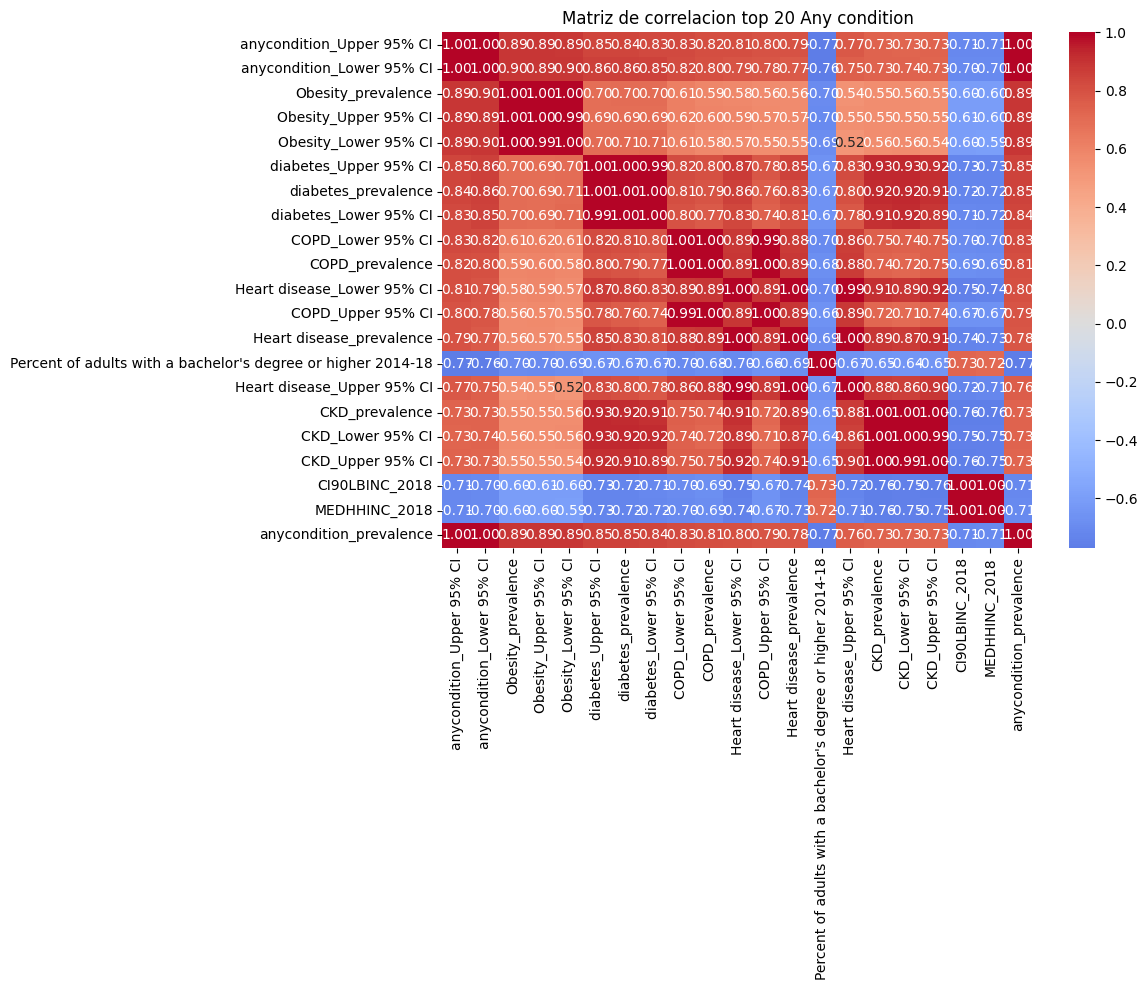

In [33]:
top_vars= top_correlated.index.tolist()+[target]

plt.figure(figsize=(12,10))
sns.heatmap(df_model[top_vars].corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de correlacion top 20 Any condition")
plt.tight_layout()
plt.show()

/tmp/ipykernel_5664/849363528.py:9: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/vscode/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


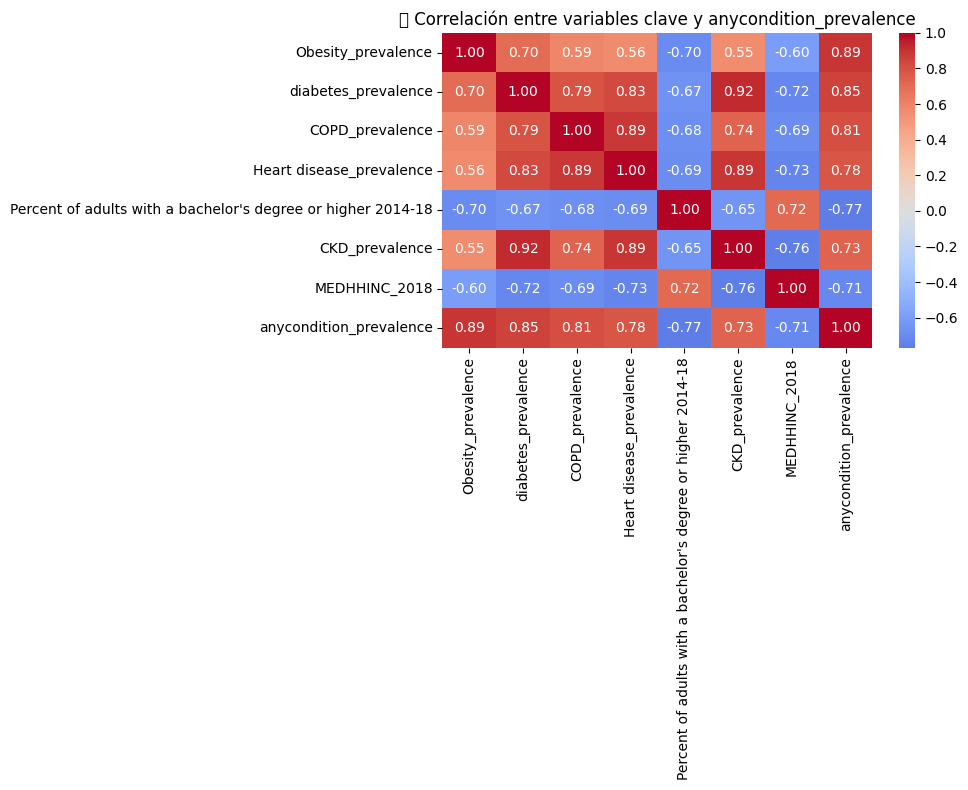

In [34]:
filtered_top = [v for v in top_correlated.index if 'CI' not in v and 'Upper' not in v and 'Lower' not in v]
filtered_top = filtered_top[:10]  # tomamos las más relevantes

top_vars_cleaned = filtered_top + [target]

plt.figure(figsize=(10, 8))
sns.heatmap(df_model[top_vars_cleaned].corr(), annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("🔎 Correlación entre variables clave y anycondition_prevalence")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Variables predictoras (features)
features = [
    'Obesity_prevalence',
    'diabetes_prevalence',
    'COPD_prevalence',
    'Heart disease_prevalence',
    'CKD_prevalence',
    "Percent of adults with a bachelor's degree or higher 2014-18",
    'MEDHHINC_2018'
]

X = df_model[features]
y = df_model['anycondition_prevalence']

# División en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado (estandarización)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("Regresión Lineal:")
print(f"R² Score: {r2_score(y_test, y_pred_lr):.4f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lr):.4f}")

Regresión Lineal:
R² Score: 0.9384
MSE: 2.5061


Interpretación:

Buen ajuste inicial.

Ahora aplicaremos Lasso, que ayuda a:

Reducir el sobreajuste

Eliminar coeficientes irrelevantes

Simplificar el modelo

/home/vscode/.local/lib/python3.11/site-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.947e+03, tolerance: 1.022e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_f

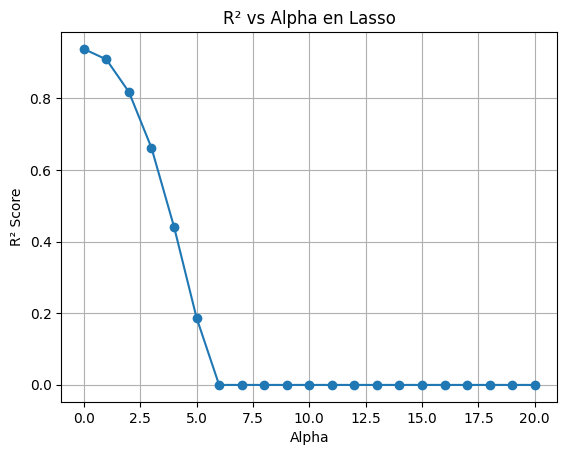

In [39]:
from sklearn.linear_model import Lasso

alphas = list(range(0, 21))
r2_scores = []

for a in alphas:
    lasso = Lasso(alpha=a, max_iter=10000)
    lasso.fit(X_train_scaled, y_train)
    y_pred = lasso.predict(X_test_scaled)
    r2_scores.append(r2_score(y_test, y_pred))


plt.plot(alphas, r2_scores, marker='o')
plt.title("R² vs Alpha en Lasso")
plt.xlabel("Alpha")
plt.ylabel("R² Score")
plt.grid(True)
plt.show()


In [40]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=alphas, cv=5, max_iter=10000, random_state=42)
lasso_cv.fit(X_train_scaled, y_train)

print("Mejor alpha encontrado:", lasso_cv.alpha_)
print("R² en test set:", lasso_cv.score(X_test_scaled, y_test))


Mejor alpha encontrado: 0
R² en test set: 0.9383561328932896


/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:681: UserWarn

El modelo no necesita regularización L1 (Lasso) para este subconjunto de variables.

Básicamente, el modelo más simple (regresión lineal) ya es el óptimo para explicar la variable objetivo.



In [41]:
import pandas as pd

coef= pd.Series(lasso_cv.coef_, index=features)

coef_sorted=coef.sort_values(ascending=False)
print("Coeficientes aprendidos x lassoCV:\n")
print(coef_sorted)

Coeficientes aprendidos x lassoCV:

Obesity_prevalence                                              3.329576
diabetes_prevalence                                             2.141323
Heart disease_prevalence                                        1.564307
COPD_prevalence                                                 0.935263
MEDHHINC_2018                                                  -0.011612
Percent of adults with a bachelor's degree or higher 2014-18   -0.367394
CKD_prevalence                                                 -1.453129
dtype: float64


 Entrenamiento con Ridge y comparación

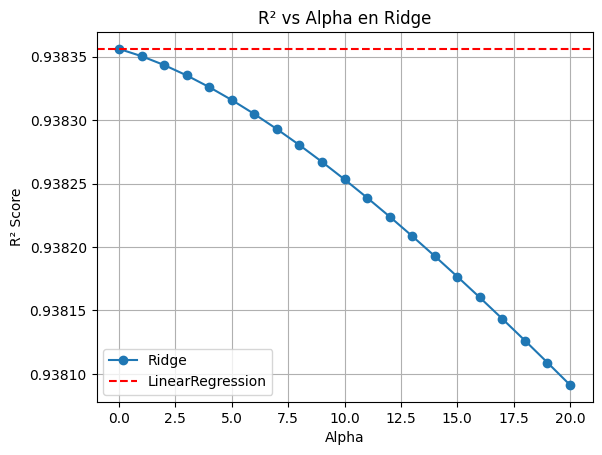

In [42]:
from sklearn.linear_model import Ridge

alphas = list(range(0, 21))
ridge_r2_scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled, y_train)
    y_pred_ridge = ridge.predict(X_test_scaled)
    ridge_r2_scores.append(r2_score(y_test, y_pred_ridge))

# Visualizar resultados
plt.plot(alphas, ridge_r2_scores, marker='o', label='Ridge')
plt.axhline(y=r2_score(y_test, y_pred_lr), color='red', linestyle='--', label='LinearRegression')
plt.title("R² vs Alpha en Ridge")
plt.xlabel("Alpha")
plt.ylabel("R² Score")
plt.legend()
plt.grid(True)
plt.show()


Conclusión
Ridge no mejora sustancialmente el modelo base, pero tiene la ventaja de estabilizar los coeficientes en presencia de multicolinealidad.

Si necesitás robustez en producción, Ridge con un alpha pequeño (1-3) puede ser más seguro que Lineal puro.

In [47]:
# Entrenamos Ridge con alpha=2
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=2)
ridge.fit(X_train_scaled, y_train)

# Coeficientes
ridge_coef = pd.Series(ridge.coef_, index=features)
ridge_coef_sorted = ridge_coef.sort_values(ascending=False)

print("Coeficientes del modelo Ridge (alpha=2):\n")
print(ridge_coef_sorted)


Coeficientes del modelo Ridge (alpha=2):

Obesity_prevalence                                              3.331351
diabetes_prevalence                                             2.110006
Heart disease_prevalence                                        1.531701
COPD_prevalence                                                 0.955225
MEDHHINC_2018                                                  -0.008139
Percent of adults with a bachelor's degree or higher 2014-18   -0.369232
CKD_prevalence                                                 -1.408343
dtype: float64


Conclusiones finales:
Ridge mantiene todos los coeficientes, y los suaviza levemente. Ideal para interpretabilidad.

Lasso haría reducción de características si los datos lo justificaran (no fue necesario en este caso).

Ambos modelos llegaron a predicciones casi idénticas (R² ≈ 0.938), lo que valida que los datos están muy bien preparados.

Conclusión basada en el análisis y modelado
1.Sí existe una fuerte relación entre variables demográficas y salud

Las condiciones crónicas (anycondition_prevalence) se correlacionan significativamente con factores como:

Obesity_prevalence (+)

diabetes_prevalence (+)

Heart disease_prevalence (+)

COPD_prevalence (+)

Esto valida que los indicadores de salud física son fuertes predictores entre sí.